In [1]:
import pandas as pd

In [53]:
from pathlib import Path

path = "../data/raw/denuncias/"
files = Path(path).glob('*.csv')

In [54]:
from pandas.core.frame import DataFrame

sedu_dataframes: list[DataFrame] = [pd.read_csv(filepath, sep=";") for filepath in files]

In [58]:
len(sedu_dataframes)

11

In [59]:
from collections import Counter

all_columns = [col for df in sedu_dataframes for col in df.columns]

column_counts = Counter(all_columns)

print("Column name occurrences:")
for col, count in column_counts.items():
    print(f"{col}: {count}")


Column name occurrences:
AGNO: 11
DEN_ID: 11
DEN_CANAL: 11
DEN_ESTADO: 11
DEN_FEC_CREACION: 11
DEN_MES_CREACION: 11
DEN_TRIMESTRE_CREACION: 11
DEN_FEC_TERMINO_DENUNCIA: 11
DEN_OFICINA: 11
DEN_DEPARTAMENTO: 11
DEN_AMBITO: 11
DEN_TEMA: 11
DEN_SUBTEMA: 11
DEN_MRUN: 11
DEN_AFECTADO: 11
DEN_SEXO: 11
DEN_TIPO: 11
AFEC_MRUN: 11
RBD: 11
EE_NOMBRE: 11
EE_COD_REGION: 11
EE_COD_PROVINCIA: 11
EE_COD_COMUNA: 11
EE_NOM_COMUNA: 11
EE_COD_DEPE: 11
EE_DEPE_AGRUP: 11
AFEC_COD_ENSE2: 11
DEN_REGION: 11
AFEC_SEXO: 10
FIS_ID: 9
FIS_ID_SEGUIMIENTO: 9
PA_ID: 9
DEN_CIBERBULLYING: 9
RSIE: 8
AFEC_TIPO: 4
DEN_ENVIO_RESP: 3
DEN_GENERO: 3
AFEC_GENERO: 3
DEN_TIPO_INSTITUCION: 3
SOST_RUT: 3
SOST_MRUN: 3
SOST_NOMBRE: 3


In [60]:
concatenated_sedu = pd.concat(sedu_dataframes, axis=0, ignore_index=True)

In [61]:
threshold = len(concatenated_sedu) * 0.99  # 1% of total rows
concatenated_sedu_cleaned: DataFrame = concatenated_sedu.dropna(axis=1, thresh=threshold)
concatenated_sedu_cleaned = concatenated_sedu_cleaned.dropna()

<Axes: xlabel='AGNO'>

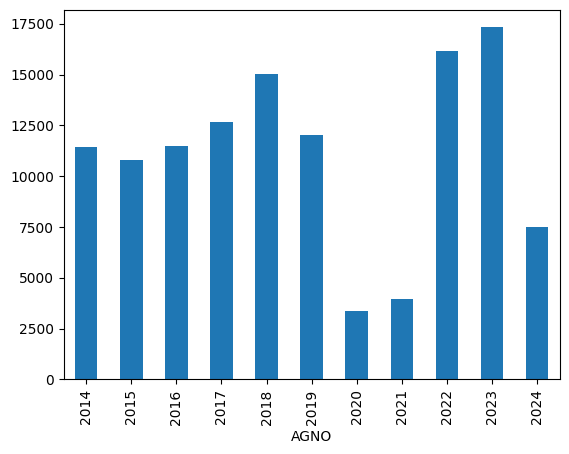

In [62]:
concatenated_sedu_cleaned.groupby(["AGNO"]).size().plot(kind='bar')

<Axes: xlabel='EE_NOM_COMUNA'>

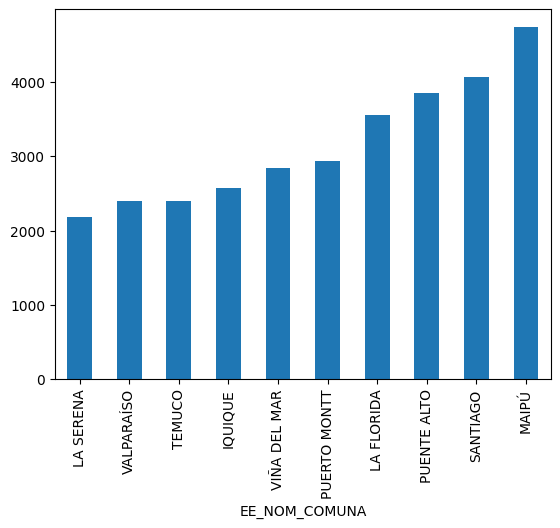

In [63]:
concatenated_sedu_cleaned.groupby(["EE_NOM_COMUNA"]).size().sort_values()[-10:].plot(kind='bar')

In [129]:
category_map = {
    0: 'Sin Información',
    1: 'Educación Parvularia',
    2: 'Educación Básica',
    3: 'Educación Básica Adultos',
    4: 'Educación Especial',
    5: 'Enseñanza Media H-C Jóvenes',
    6: 'Enseñanza Media H-C Adultos',
    7: 'Enseñanza Media T-P Jóvenes',
    8: 'Enseñanza Media T-P Adultos',

}
concatenated_sedu_cleaned["AFEC_COD_ENSE2"] = concatenated_sedu_cleaned["AFEC_COD_ENSE2"].map(category_map)

<Axes: xlabel='AFEC_COD_ENSE2'>

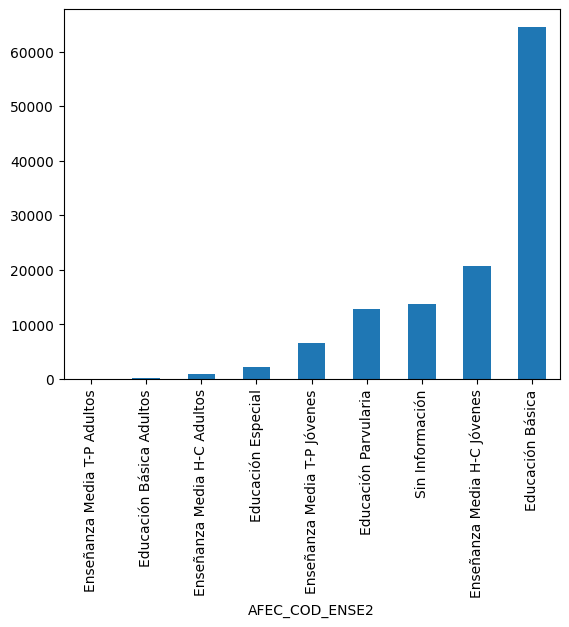

In [130]:


concatenated_sedu_cleaned.groupby(["AFEC_COD_ENSE2"]).size().sort_values()[-10:].plot(kind='bar')

<Axes: ylabel='DEN_TEMA'>

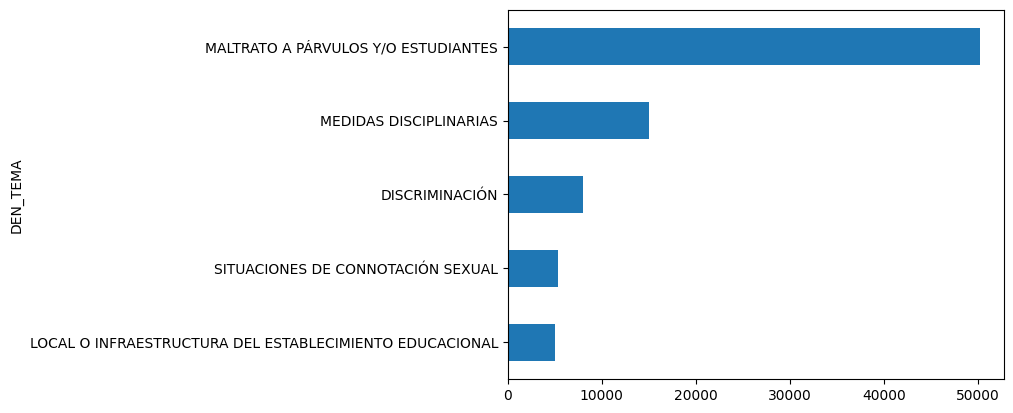

In [65]:
concatenated_sedu_cleaned.groupby(["DEN_TEMA"]).size().sort_values()[-5:].plot(kind='barh')

In [73]:
df_ive_media = pd.read_excel("../data/raw/denuncias/IVE-2023.xlsx", skiprows=3, sheet_name="MEDIA")

In [75]:
df_ive_basica = pd.read_excel("../data/raw/denuncias/IVE-2023.xlsx", skiprows=3, sheet_name="BASICA")

In [85]:
df_ive_basica = df_ive_basica.dropna(subset = ['ID_RBD'])

In [86]:
df_ive_media = df_ive_media.dropna(subset = ['ID_RBD'])

In [87]:
df_ive_join = df_ive_basica.join(df_ive_media, on="ID_RBD", lsuffix="_BASICA", rsuffix="_MEDIA")

In [89]:
df_ive_join = pd.merge(left=df_ive_basica, right=df_ive_media, left_on="ID_RBD",right_on="ID_RBD", how="outer", sort=False, suffixes=("_basica","_media")
)

In [90]:
df_ive_join.columns

Index(['ID_RBD', 'DV_RBD_basica', 'DS_NOM_ESTABLE_basica',
       'ID_REGION_ESTABLE_basica', 'DS_REGION_ESTABLE_basica',
       'ID_PROVINCIA_ESTABLE_basica', 'DS_PROVINCIA_ESTABLE_basica',
       'ID_COMUNA_ESTABLE_basica', 'DS_COMUNA_ESTABLE_basica',
       'ID_TIPO_DEPENDENCIA_basica', 'DS_TIPO_DEPENDENCIA_basica',
       'ID_RURALIDAD_basica', 'DS_RURALIDAD_basica',
       'PRIMERA PRIORIDAD_basica', 'SEGUNDA PRIORIDAD_basica',
       'TERCERA PRIORIDAD_basica', 'NO PRIORIZADO EN VULNERABILIDAD_basica',
       'SIN INFORMACION_basica', 'TOTAL MATRICULA BÁSICA DIC 2022',
       'IVE-SINAE BÁSICA 2023', 'DV_RBD_media', 'DS_NOM_ESTABLE_media',
       'ID_REGION_ESTABLE_media', 'DS_REGION_ESTABLE_media',
       'ID_PROVINCIA_ESTABLE_media', 'DS_PROVINCIA_ESTABLE_media',
       'ID_COMUNA_ESTABLE_media', 'DS_COMUNA_ESTABLE_media',
       'ID_TIPO_DEPENDENCIA_media', 'DS_TIPO_DEPENDENCIA_media',
       'ID_RURALIDAD_media', 'DS_RURALIDAD_media', 'PRIMERA PRIORIDAD_media',
       'SEGUND

In [102]:
n_denun_rbd = concatenated_sedu_cleaned.groupby(['RBD']).size().to_frame().reset_index()

In [105]:
import numpy as np

In [107]:
n_denun_rbd["RBD"] = n_denun_rbd['RBD'].replace(' ', np.nan).dropna().astype(float)

In [119]:
n_denun_rbd['N_denuncias'] = n_denun_rbd[0]

In [120]:
n_denun_rbd

,RBD,0,N_denuncias
0,NaN,5296,5296
1,1.0,24,24
2,10.0,1,1
3,1000.0,1,1
4,10000.0,12,12
...,...,...,...
10216,9994.0,5,5
10217,9995.0,11,11
10218,9996.0,5,5
10219,9998.0,13,13


In [121]:
df_ive_basica_join = pd.merge(left=df_ive_basica, right=n_denun_rbd, left_on="ID_RBD",right_on="RBD", how="inner", sort=False, suffixes=("","_N_den"))

In [122]:
df_ive_media_join = pd.merge(left=df_ive_media, right=n_denun_rbd, left_on="ID_RBD",right_on="RBD", how="inner", sort=False, suffixes=("","_N_den"))

<Axes: xlabel='N_denuncias', ylabel='IVE-SINAE BÁSICA 2023'>

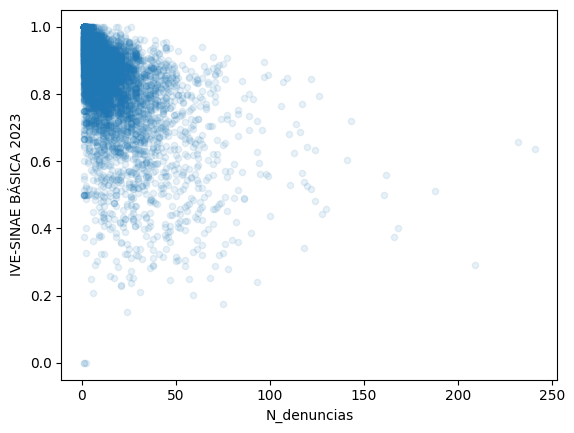

In [127]:
df_ive_basica_join.plot(kind='scatter', y='IVE-SINAE BÁSICA 2023', x="N_denuncias", alpha=0.1)

<Axes: xlabel='N_denuncias', ylabel='IVE-SINAE MEDIA 2023'>

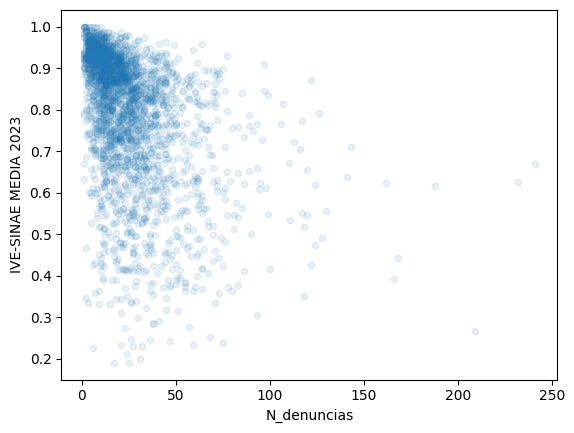

In [128]:
df_ive_media_join.plot(kind='scatter', y='IVE-SINAE MEDIA 2023', x="N_denuncias", alpha=0.1)